# matplotlib

Wizualizacje w matplotlib (książka) https://hal.inria.fr/hal-03427242/document

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x = np.linspace(0, 2 * np.pi, 10)

In [3]:
y = np.sin(x)

In [4]:
print(x)

[0.         0.6981317  1.3962634  2.0943951  2.7925268  3.4906585
 4.1887902  4.88692191 5.58505361 6.28318531]


## Wykres liniowy

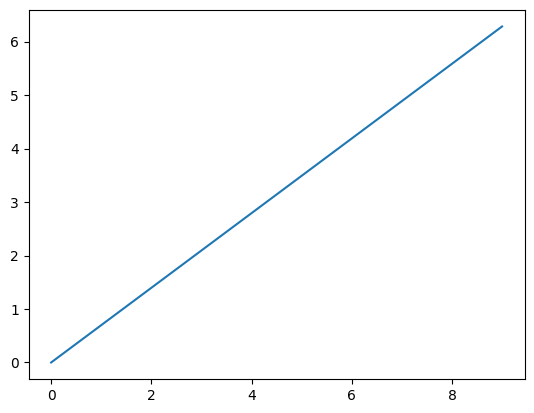

In [5]:
plt.plot(x)
plt.show() #potrzebne w niektórych IDE

#### modyfikacje

Text(0, 0.5, 'sinus')

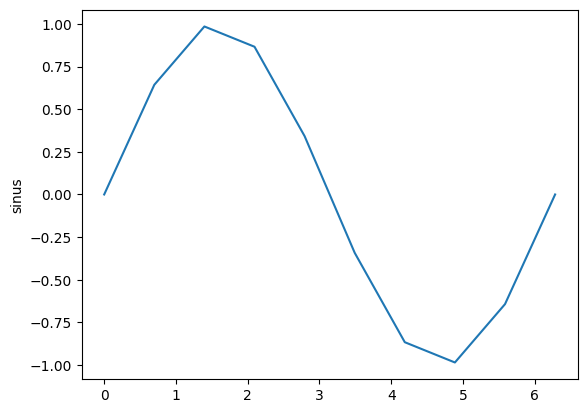

In [6]:
plt.plot(x, y)
plt.ylabel('sinus')

In [ ]:
plt.plot(x, y)
plt.ylabel('sinus')
plt.title("SINUS", loc = "left")
plt.show()

In [ ]:
plt.plot(x, y, linestyle = "--")
plt.show()

In [ ]:
plt.plot(x, y, color = "#371ea3")

Więcej: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot

In [ ]:
plt.plot(x, y, label = "sin")
plt.plot(x, -y, label = "-sin")
plt.legend()
plt.show()

## Wykres słupkowy

In [ ]:
names  = ['A', 'B', 'C']

In [ ]:
values = [2, 8, 15]

In [ ]:
plt.bar(names, values)
plt.show()

In [ ]:
plt.barh(names, values)
plt.show()

In [ ]:
plt.barh(names, values)
plt.plot(values, names, color = "green", marker = ".", markersize = 22)
plt.show()

Więcej: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar

## Wykres punktowy

In [ ]:
plt.scatter(names, values)
plt.show()

In [ ]:
size = [10, 30, 90]
plt.scatter(names, values, s = size)
plt.show()

Więcej: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter

## Histogram

In [7]:
x = np.random.randn(1000)

num_bins = 50

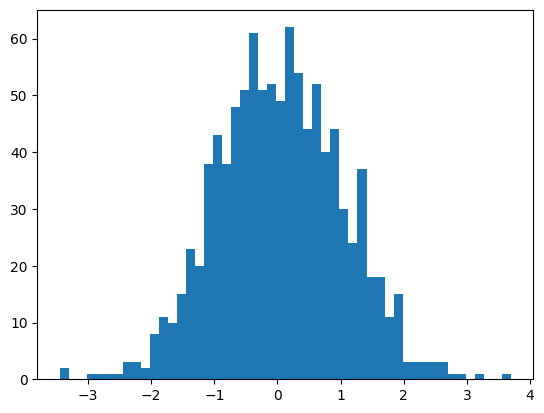

In [8]:
plt.hist(x, num_bins)
plt.show()

## Figury

`plt.plot()` pozwala na narysowanie tylko jednej figury o współrzędnych (x,y)

In [ ]:
names = ['X', 'Y', 'Z']
values = [3, 9, 27]

In [ ]:
plt.bar(names, values)
plt.show()

`plt.figure()` definiuje figurę, możemy na niej umieszczać inne elementy

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) #nrow, ncol, index
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) #nrow, ncol, index
ax.bar(names, values)
plt.show()

`plt.subplot()` - pozwala na rysowanie jednej lub kilku figur w tym samym oknie

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1) #2 wiersze, 1 kolumna

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('Tytuł')

ax1.bar(names, values)
ax2.bar(names, [2,2,5])

plt.show()

# seaborn

In [10]:
import seaborn as sns
import pandas as pd

In [ ]:
# opcje wyświetlania

In [ ]:
sns.set(rc = {'figure.figsize': (12,7)})
sns.set_style("darkgrid")
pd.options.display.max_rows = 10
pd.set_option('display.width', 5000)
pd.set_option('display.max_columns', 60)

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/mini-pw/2021Z-DataVisualizationTechniques/master/labs/data/Pokemon.csv", index_col=0, sep=",")

In [ ]:
df.head()

## Wykres punktowy

In [ ]:
sns.scatterplot(data=df, x='Attack', y='Defense')
plt.show()

In [ ]:
sns.scatterplot(data=df, x='Attack', y='Defense', hue='Stage')
plt.show()

In [ ]:
sns.scatterplot(data=df, x='Attack', y='Defense', size='Stage')
plt.show()

In [ ]:
sns.scatterplot(data=df, x='Attack', y='Defense', hue='Stage')

plt.ylim(None, 150)
plt.xlim(-100, None)
plt.show()

## boxplot

In [ ]:
sns.boxplot(data=df, color='w')
plt.show()

In [ ]:
sns.boxplot(data=df, color='w')
plt.show()

In [ ]:
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)

In [ ]:
sns.boxplot(data=stats_df)

In [ ]:
sns.boxplot(data=stats_df, x = 'Type 1', y = 'Attack')
plt.show()

## violin plot

In [ ]:
sns.violinplot(x = 'Type 1', y = 'Attack', data=df)

In [ ]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

sns.violinplot(x='Type 1', y='Attack', data=df,
               palette=pkmn_type_colors)
plt.show()



## swarm plot

In [ ]:
sns.swarmplot(x='Type 1', y='Attack', data=df,
              palette=pkmn_type_colors)
plt.show()

## nakładanie wykresów

In [ ]:
sns.violinplot(x='Type 1',
               y='Attack',
               data=df,
               inner=None, # usunięcie boxplotów ze środka
               palette=pkmn_type_colors)

sns.swarmplot(x='Type 1',
              y='Attack',
              data=df,
              color='black')# czarne punkty

# Tytuł z matplotlib
plt.title('Attack by Type')
plt.show()

In [ ]:
melted_df = pd.melt(stats_df,
                    id_vars=["Name", "Type 1", "Type 2"], # Zmienne do zatrzymania
                    var_name="Stat") # Nazwa nowej zmiennej
melted_df

In [ ]:
sns.boxplot(x='Stat', y='value', data=melted_df,
              hue='Type 1')
plt.show()

In [ ]:
# powiększamy wykres
plt.figure(figsize=(16,7))

sns.boxplot(x='Stat',
              y='value',
              data=melted_df,
              hue='Type 1',
              palette=pkmn_type_colors) # dodajemy paletę

# przenosimy legendę
plt.legend(bbox_to_anchor=(1, 1))
plt.show()



## panele

In [ ]:
g = sns.catplot(x='Type 1',
                   y='Attack',
                   data=df,
                   hue='Stage',  # kolor
                   col='Stage',  # podział po Stage
                   kind='box') # typ

g.set_xticklabels(rotation=-45)

plt.show()

## Zadanie

Narysować wykresy dla zbioru danych Titanic:

a) histogram zmiennej fare

b) boxplot wieku w podziale na płeć

c) wykres słupkowy pokazujący liczbę pasażerów w każdej z trzech klas

d) procent osób, które przeżyły (survived) w każdej z klas

In [11]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


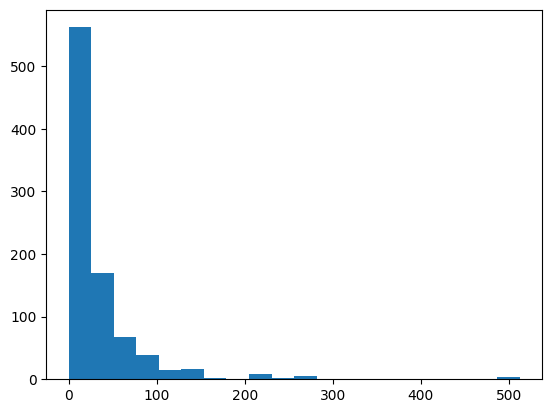

In [15]:
plt.hist(titanic.fare, 20)
plt.show()

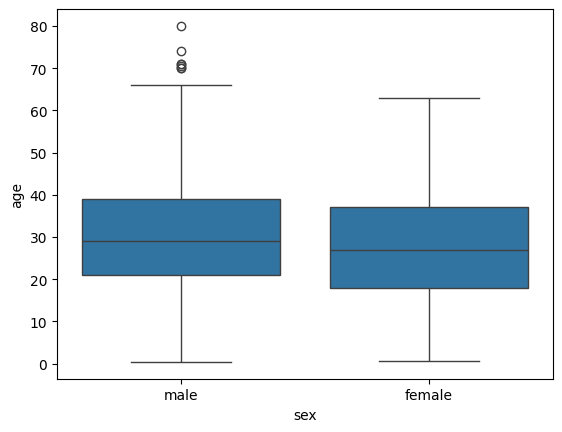

In [14]:
sns.boxplot(data = titanic, x = titanic.sex, y = titanic.age)
plt.show()

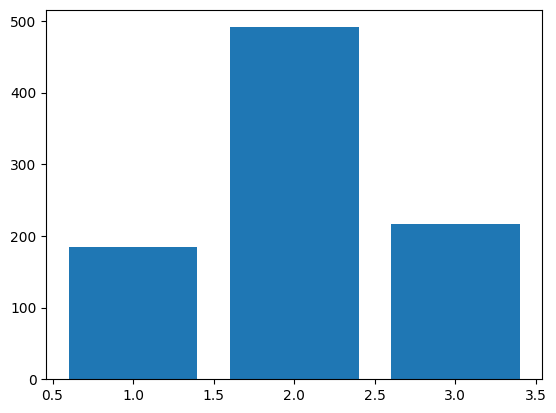

In [19]:
plt.bar(titanic.pclass.unique(), titanic.groupby("pclass").size())
plt.show()